In [23]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))

In [24]:
from codes.utils import load_alpha_digits
import matplotlib.pyplot as plt
import numpy as np
from codes.RBM import RBM
from codes.DNN import DNN

# Alpha Digits Test RBM

In [25]:
def alpha(up_to):
    data = load_alpha_digits()
    digits = []
    for digit_idx in range(up_to+1):
        digit = [data["dat"][10+digit_idx][i].flatten() for i in range(data["dat"][digit_idx].shape[0])]
        digit = np.array(digit)
        digits.append(digit)

    digits = np.concatenate(digits)
    return digits

def gen_and_plot(rbm: RBM):
    fig, axs = plt.subplots(1, 5)
    fig.set_size_inches(17, 3)
    gen = rbm.generate_image(5, 100, reshape=(20, 16))
    for i in range(5):
        axs[i].imshow(gen[i], cmap='gray')
    plt.show()

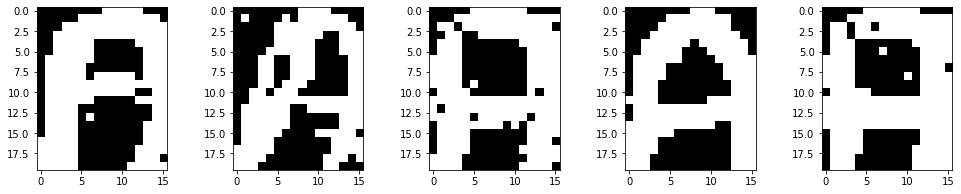

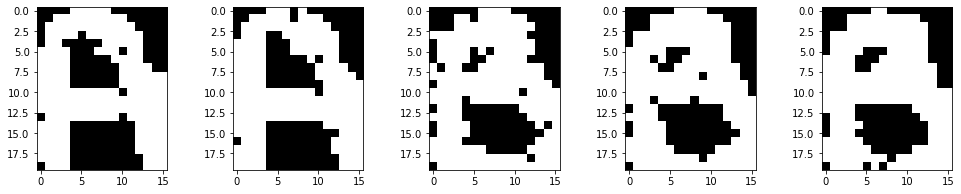

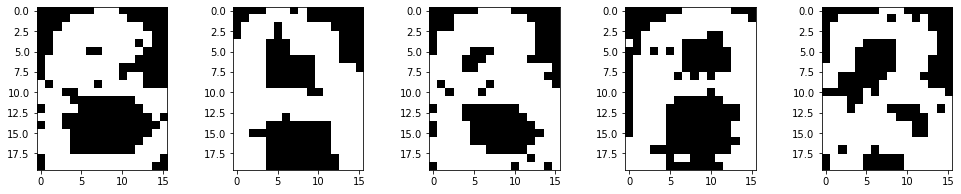

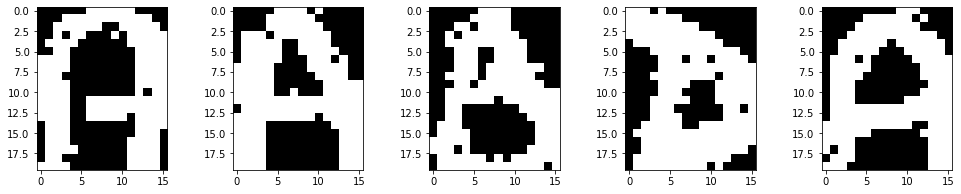

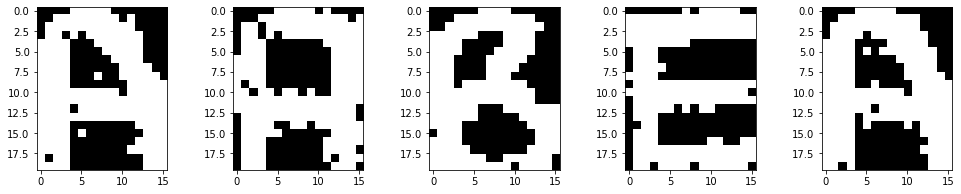

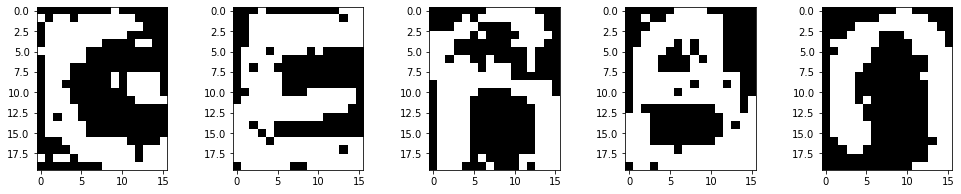

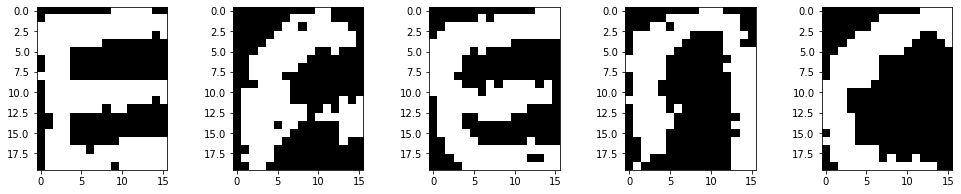

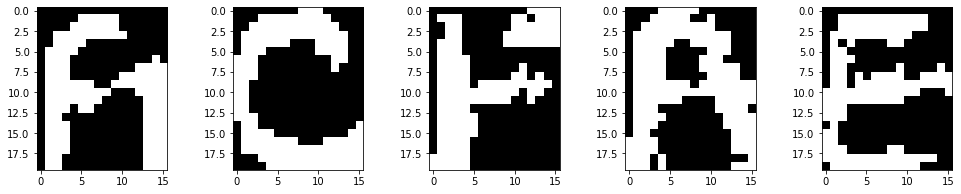

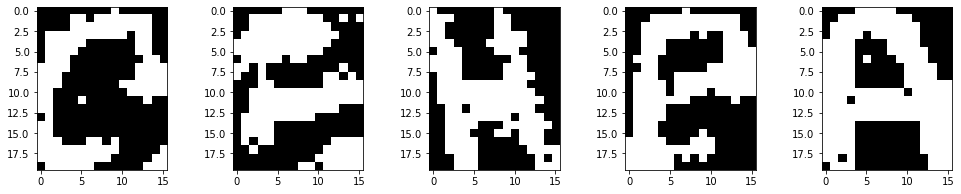

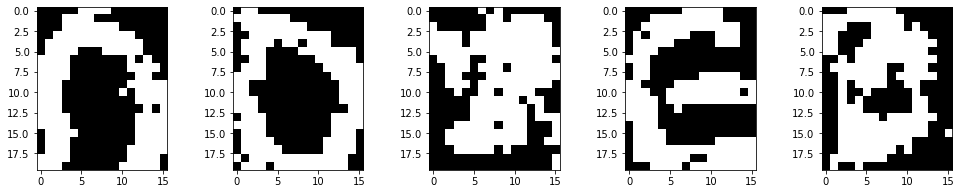

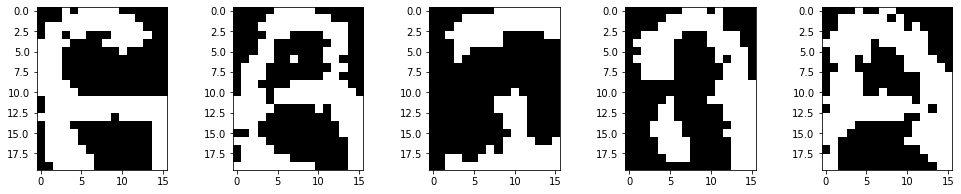

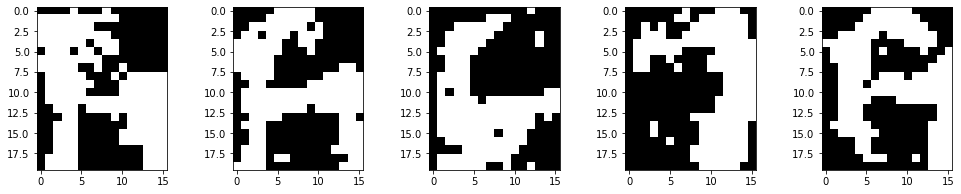

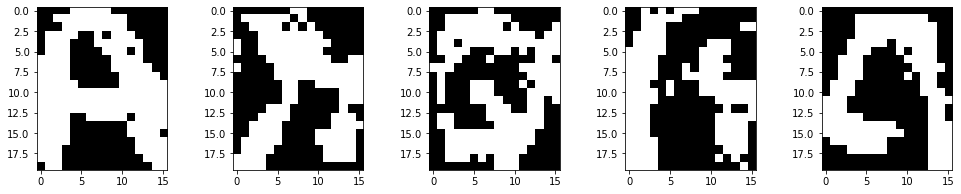

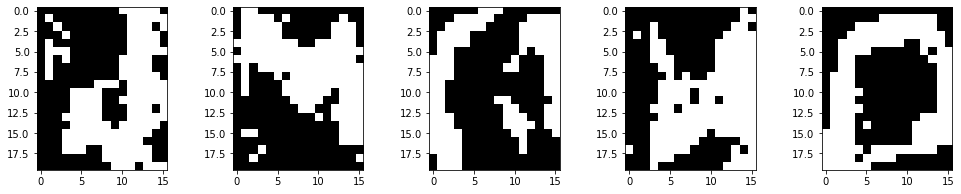

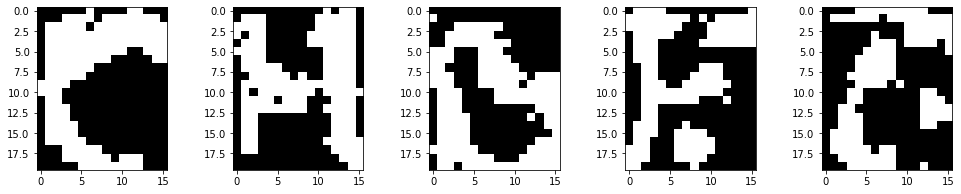

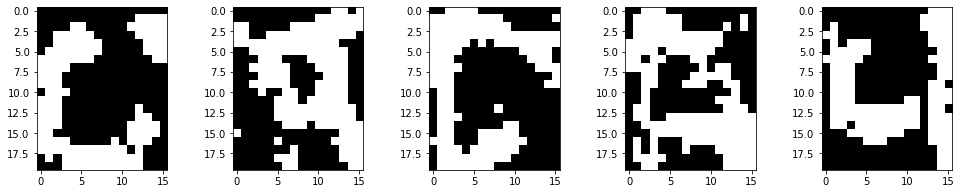

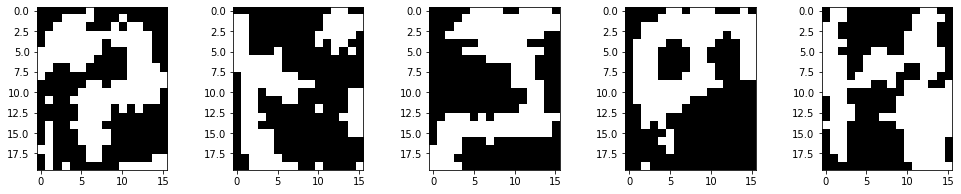

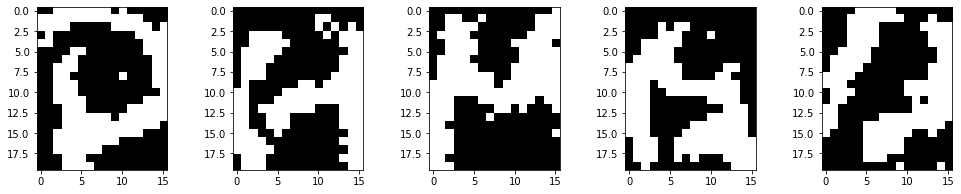

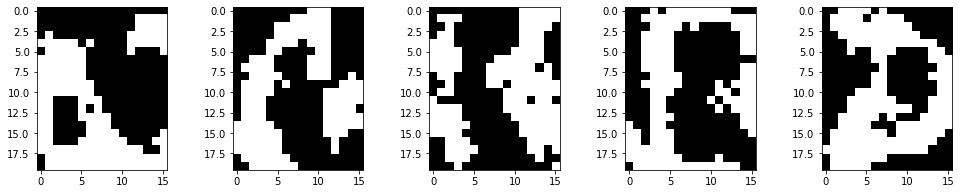

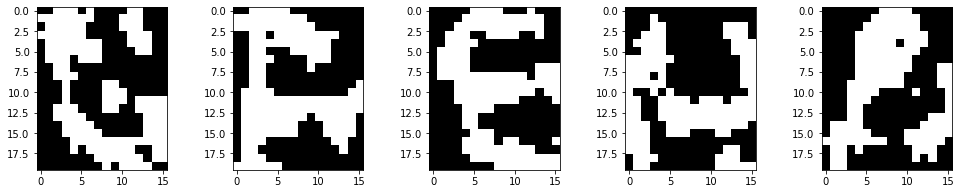

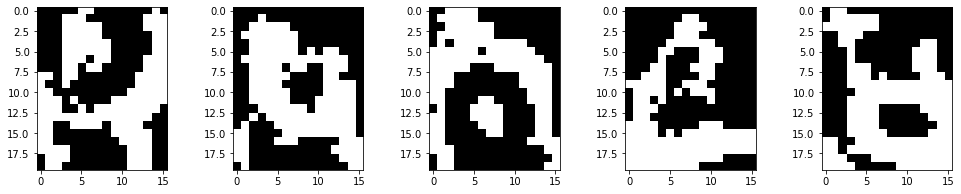

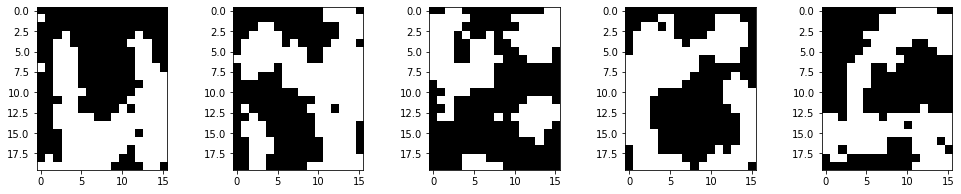

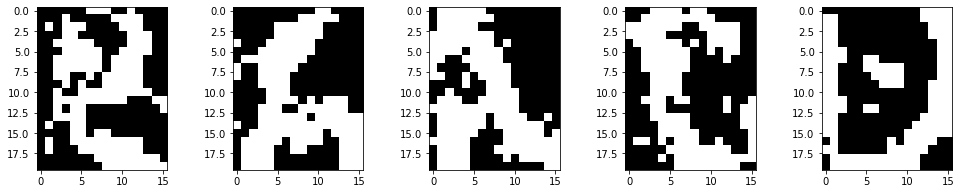

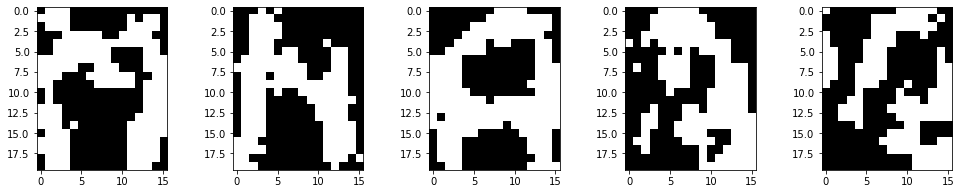

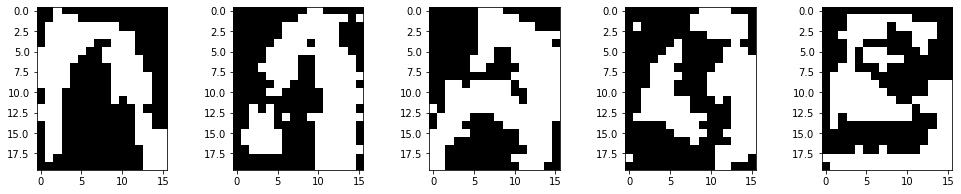

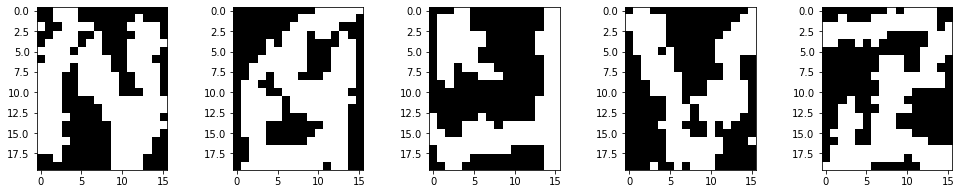

In [26]:
for letter in range(26):
    reduced_dataset = alpha(up_to=letter)
    rbm = RBM(reduced_dataset.shape[1], 200)
    errors = rbm.train(reduced_dataset, 32, num_epochs=500, lr=0.1, verbose=False)
    gen_and_plot(rbm)

# Mnist Test RBM

In [39]:
from codes.utils import load_mnist

train = load_mnist()

img = train[0][0]
label = train[1][0]

img = [img[i].flatten().reshape(1,-1) for i in range(img.shape[0])]
img = np.concatenate(img)
img.shape

def mnist(number):
    numbers = train[0][0][train[1][0]<number+1]
    numbers = [numbers[i].flatten() for i in range(numbers.shape[0])]
    numbers = np.array(numbers)
    return numbers

ValueError: Given reshape (20, 16) is incompatible with the input size 784.

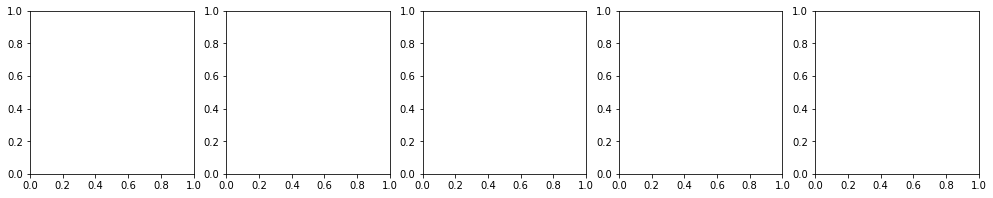

In [40]:
for number in range(10):
    reduced_dataset = mnist(number)
    rbm = RBM(reduced_dataset.shape[1], 200)
    errors = rbm.train(reduced_dataset, 32, num_epochs=500, lr=0.1, verbose=False)
    gen_and_plot(rbm)